# Aprendizaje por Refuerzo con Q-Learning
El objetivo de esta práctica es implementar desde cero el algoritmo de Q-Learning, una técnica clásica de Aprendizaje por Refuerzo (RL), y aplicarlo a dos entornos discretos del simulador OpenAI Gym: FrozenLake-v1 y Taxi-v3. Al finalizar, comprenderás cómo un agente puede aprender a tomar decisiones óptimas a través de la interacción con su entorno, sin conocer previamente sus reglas.

**¿Qué aprenderás?**
- Los fundamentos del algoritmo Q-Learning.
- Cómo aplicar RL a entornos con espacios de estados y acciones discretos.
- El impacto de parámetros como α (learning rate), γ (discount factor) y ε (exploración).
- Cómo evaluar el desempeño del agente entrenado.

**Objetivos de la práctica**

- Comprender el algoritmo Q-Learning.
- Aplicarlo a entornos con espacio discreto.
- Comparar desempeño y convergencia.
- Observar impacto de hiperparámetros.

## Parte 1: Q-Learning en FrozenLake (5x5)

**¿Qué es FrozenLake-v1?**

Es un juego de cuadrícula (gridworld) donde el agente debe desplazarse desde un punto de inicio hasta una meta, evitando caer en agujeros.


```
(Tablero 4x4)
S F F F         
F H F H
F F F H
H F F G
```
- S: posición inicial del agente (Start)
- F: casilla segura (Free)
- H: agujero (Hole) – si el agente cae aquí, pierde
- G: objetivo (Goal) – si llega, gana

El agente puede moverse arriba, abajo, izquierda o derecha. Su objetivo es llegar a la casilla G evitando los agujeros.

**Dos modos:**
- is_slippery=True: el entorno es estocástico. El agente puede resbalar y moverse a una dirección distinta a la elegida.

- is_slippery=False: el entorno es determinista. El agente se mueve exactamente donde elige. Es ideal para empezar con Q-Learning.

**Recompensas**
- legar a la meta (G): +1
- Cualquier otro paso (o caer en un agujero): 0
- No hay penalización por moverse, solo por fallar o terminar el juego.

En esta práctica aplicamos el algoritmo Q-Learning al entorno FrozenLake-v1 de OpenAI Gym, un entorno con espacio de estados y acciones discreto, ideal para introducir los fundamentos del aprendizaje por refuerzo. El objetivo del agente es llegar a la meta evitando los agujeros del lago helado.

Primero, inicializamos la Q-table, una matriz de tamaño (n_estados x n_acciones), que almacenará las estimaciones del valor de cada acción en cada estado. Definimos los hiperparámetros: alpha (tasa de aprendizaje), gamma (factor de descuento), epsilon (exploración), y el número total de episodios. Durante cada episodio, el agente elige acciones siguiendo una política ε-greedy, que equilibra exploración y explotación. Luego, observa el resultado y actualiza su Q-table usando la fórmula de Q-Learning.

Al finalizar el entrenamiento, se puede observar el comportamiento aprendido ejecutando el entorno con la Q-table entrenada. Si todo ha ido bien, el agente debería ser capaz de llegar a la meta de manera consistente. Esta práctica permite ver en acción cómo un agente mejora su política únicamente interactuando con el entorno, sin conocer previamente sus reglas.

In [ ]:
!pip install numpy==1.23.5

In [ ]:
# Importamos las librerías necesarias:
import gym # librería encargada de proporcionar el entorno de los juegos
import numpy as np # librería de matemáticas para manejar la matriz Q
import random # para las decisiones de exploración aleatoria

# Crear el entorno (determinista)
env = gym.make("FrozenLake-v1", is_slippery=False)

# Inicializar la Q-table: estados x acciones
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Hiperparámetros
alpha = 0.1           # Tasa de aprendizaje
gamma = 0.99          # Factor de descuento
epsilon = 1.0         # Nivel inicial de exploración
epsilon_decay = 0.999 # Factor de decaimiento de epsilon; empezar con 0.99 subir a 0.999 si no converge
episodes = 2000       # Número de episodios

# Entrenamiento
for ep in range(episodes):
    state = env.reset()  # Solo devuelve el estado
    done = False

    while not done:
        # Política epsilon-greedy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explora
        else:
            action = np.argmax(q_table[state])  # Explota

        # Paso del entorno (API antigua: 4 valores)
        next_state, reward, done, _ = env.step(action)

        # Actualización de la Q-table
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state

    # Decaimiento de epsilon
    epsilon *= epsilon_decay

print("Entrenamiento finalizado.")

Entrenamiento finalizado.


Lo visualizamos desenvolviendose

In [ ]:
import matplotlib.pyplot as plt
import time

def plot_agent(state, size=4):
    grid = np.zeros((size, size))
    x, y = divmod(state, size)
    grid[x][y] = 1  # Posición del agente

    plt.imshow(grid, cmap='Blues')
    plt.xticks([])
    plt.yticks([])
    plt.title("Posición del agente")
    plt.show(block=False)
    plt.pause(0.5)
    plt.clf()

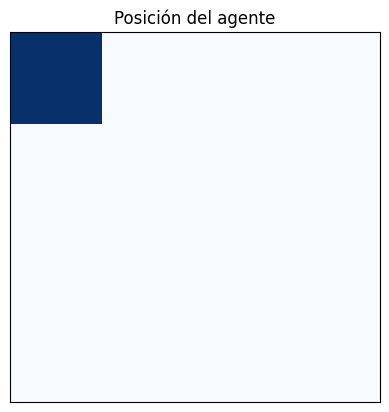

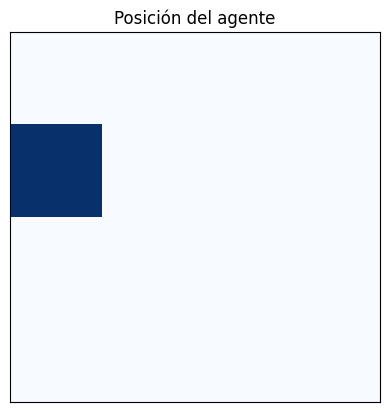

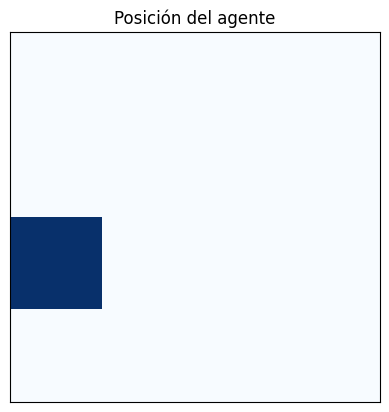

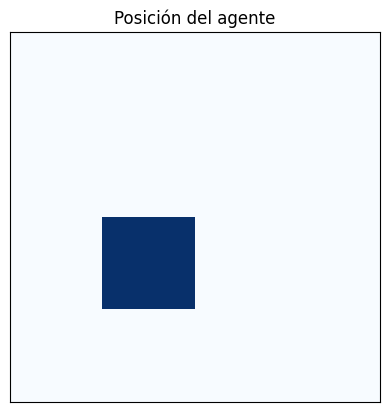

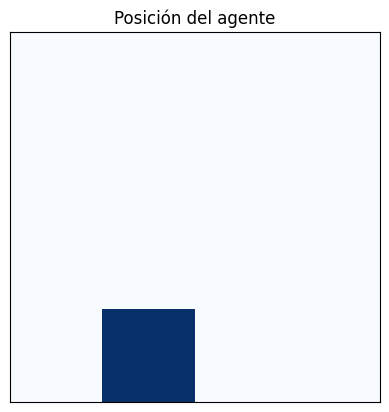

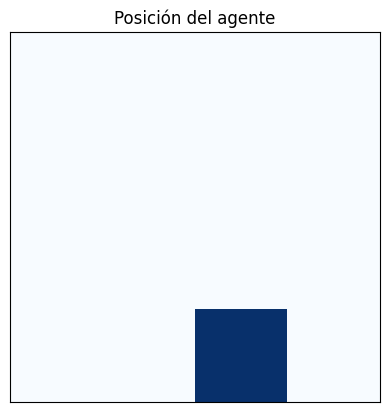

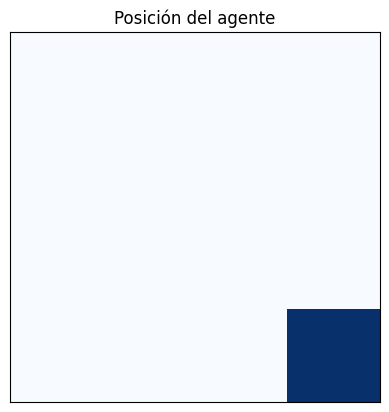

<Figure size 640x480 with 0 Axes>

In [ ]:
# probamos el agente entrenado

state = env.reset()
done = False

plot_agent(state)

while not done:
    action = np.argmax(q_table[state])
    state, reward, done, _ = env.step(action)
    plot_agent(state)


Un valor de epsilon_decay más bajo (como 0.99) reduce demasiado rápido la exploración. Si el agente no ha descubierto la meta durante los primeros episodios, se queda atrapado repitiendo acciones no óptimas, porque no tiene información valiosa en la Q-table para explotar.

En cambio, con un epsilon_decay = 0.999, el agente explora durante más tiempo, lo que incrementa la probabilidad de encontrar la meta por azar en las primeras fases. Esto le permite recibir al menos una señal positiva, que puede usar para ajustar la política de manera significativa.

En entornos con recompensas escasas y sin penalizaciones claras, como FrozenLake, es mejor explorar más tiempo. Una convergencia temprana hacia una política no informada lleva al estancamiento.

## Parte 2: Q-Learning en TaxiDriver

**¿Qué es Taxi-v3 en Gym?**

Taxi-v3 es un entorno clásico de OpenAI Gym diseñado para experimentar con algoritmos de aprendizaje por refuerzo. A diferencia de FrozenLake, es un entorno más estructurado y con recompensas más densas, lo que lo hace excelente para ver cómo el agente mejora con el tiempo.

El entorno es una cuadrícula de 5x5, con ubicaciones fijas y marcadas:
```
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| : | : : |
|Y: | : :B|
+---------+

```
- R, G, Y, B: ubicaciones donde pueden estar los pasajeros o sus destinos.
- El taxi puede moverse en 4 direcciones: norte, sur, este, oeste.
- También puede hacer dos acciones especiales: recoger y dejar al pasajero.


**Objetivo del agente**
- Recoger al pasajero en una de las ubicaciones (R, G, Y o B).
- Llevarlo al destino correcto (otra de esas ubicaciones).
- Evitar moverse innecesariamente (cada paso cuesta).
- Evitar errores, como intentar recoger o dejar al pasajero en el lugar incorrecto (tiene penalización).

**Recompensas**
- +20: si deja correctamente al pasajero.
- -1: por cada movimiento.
- -10: si intenta recoger o dejar al pasajero en el lugar incorrecto.

Esto hace que el agente aprenda no solo a resolver el problema, sino también a optimizar el camino.

Es hace un entorno densamente recompensado y con penalización negativa clara, a diferencia de FrozenLake. Pero el espacio de estados también es mucho más grande: 500 estados posibles.

Hay 6 acciones posibles:
- Moverse hacia el sur
- Moverse hacia el norte
- Moverse hacia el este
- Moverse hacia el oeste
- Recoger pasajero
- Dejar pasajero

In [ ]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

def train_taxi_qlearning(episodes=5000, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.999):
    env = gym.make("Taxi-v3")
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_per_episode = []

    for ep in range(episodes):
        state = env.reset()
        if isinstance(state, tuple):  # compatibilidad Gym moderno
            state = state[0]
        done = False
        total_reward = 0

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            result = env.step(action)
            if len(result) == 5:
                next_state, reward, terminated, truncated, _ = result
                done = terminated or truncated
            else:
                next_state, reward, done, _ = result

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

            state = next_state
            total_reward += reward

        epsilon *= epsilon_decay
        rewards_per_episode.append(total_reward)

    print("✅ Entrenamiento finalizado.")
    return env, q_table, rewards_per_episode


In [ ]:
def evaluate_taxi_agent(env, q_table, max_steps=50):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    done = False
    steps = 0
    total_reward = 0

    print("🚕 Agente entrenado actuando en el entorno:")
    env.render()

    while not done and steps < max_steps:
        action = np.argmax(q_table[state])
        result = env.step(action)

        if len(result) == 5:
            state, reward, terminated, truncated, _ = result
            done = terminated or truncated
        else:
            state, reward, done, _ = result

        env.render()
        steps += 1
        total_reward += reward

    print("🏁 Episodio terminado. Recompensa total:", total_reward)

In [ ]:
def plot_rewards(rewards_per_episode, window=100):
    averages = [np.mean(rewards_per_episode[i:i+window]) for i in range(len(rewards_per_episode)-window)]
    plt.plot(averages)
    plt.title("Recompensa promedio por cada 100 episodios")
    plt.xlabel("Episodios")
    plt.ylabel("Recompensa promedio")
    plt.grid()
    plt.show()


✅ Entrenamiento finalizado.


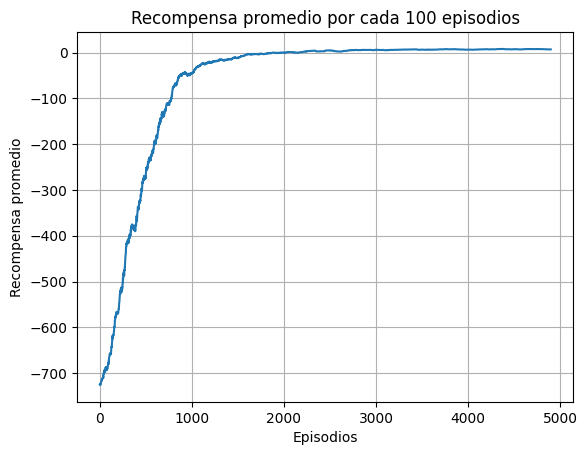

🚕 Agente entrenado actuando en el entorno:


/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


🏁 Episodio terminado. Recompensa total: 7


In [ ]:
env, q_table, rewards = train_taxi_qlearning(
    episodes=5000,
    alpha=0.1,
    gamma=0.99,
    epsilon=1.0,
    epsilon_decay=0.999
)

plot_rewards(rewards)
evaluate_taxi_agent(env, q_table)


Luego de entrenar, vamos a visualizarlo ejecutando la tarea

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Coordenadas de ubicaciones especiales en Taxi-v3
location_coords = {
    0: (0, 0),  # R
    1: (0, 4),  # G
    2: (4, 0),  # Y
    3: (4, 3),  # B
}

def decode_state(state):
    """Extrae info del estado codificado: taxi_row, taxi_col, passenger_loc, destination"""
    taxi_row = state // 100
    taxi_col = (state % 100) // 20
    passenger_loc = (state % 20) // 4
    destination = state % 4
    return taxi_row, taxi_col, passenger_loc, destination

def draw_taxi_board(state, step):
    taxi_row, taxi_col, passenger_loc, destination = decode_state(state)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 4.5)
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    ax.grid(True)

    # Dibujar ubicaciones especiales
    for idx, (r, c) in location_coords.items():
        label = ['R', 'G', 'Y', 'B'][idx]
        ax.text(c, 4 - r, label, ha='center', va='center', fontsize=14, color='gray')

    # Dibujar pasajero
    if passenger_loc < 4:
        pr, pc = location_coords[passenger_loc]
        ax.text(pc, 4 - pr, "Pasajero", ha='center', va='center', fontsize=14)

    # Dibujar destino
    dr, dc = location_coords[destination]
    ax.text(dc, 4 - dr, "Meta", ha='center', va='center', fontsize=14)

    # Dibujar taxi
    ax.text(taxi_col, 4 - taxi_row, "TAXI", ha='center', va='center', fontsize=16, color='blue')

    ax.set_title(f"Paso {step}")
    plt.pause(0.5)
    plt.close()

def visualize_taxi_agent(env, q_table, max_steps=50):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]

    done = False
    step = 0
    total_reward = 0

    draw_taxi_board(state, step)

    while not done and step < max_steps:
        action = np.argmax(q_table[state])
        result = env.step(action)

        if len(result) == 5:
            state, reward, terminated, truncated, _ = result
            done = terminated or truncated
        else:
            state, reward, done, _ = result

        step += 1
        total_reward += reward
        draw_taxi_board(state, step)

    print("🏁 Episodio terminado. Recompensa total:", total_reward)


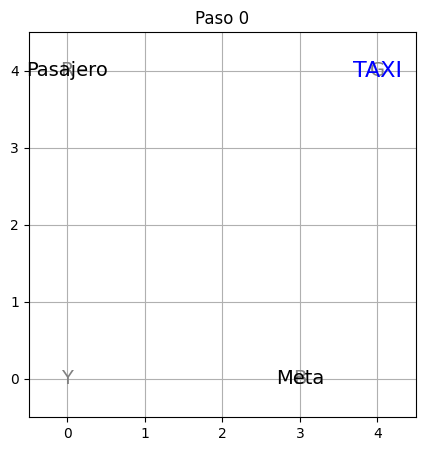

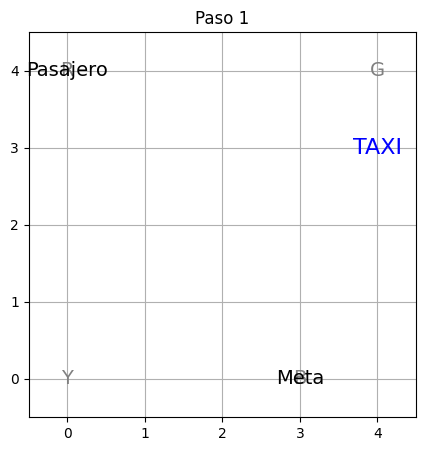

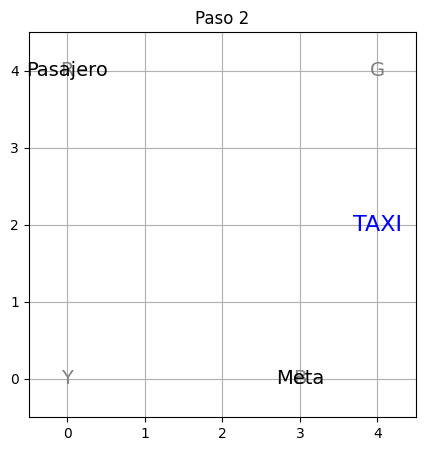

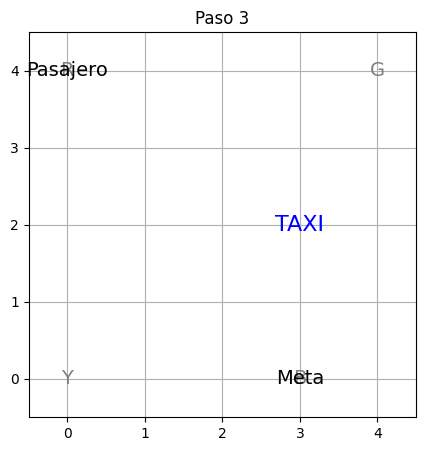

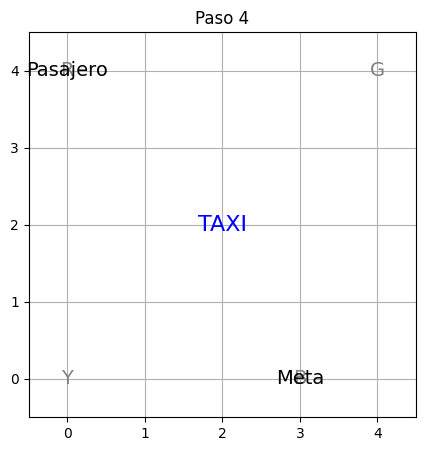

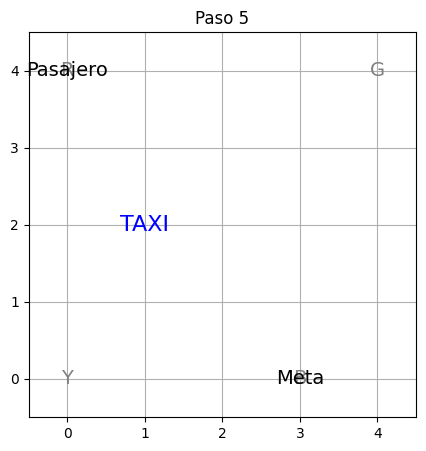

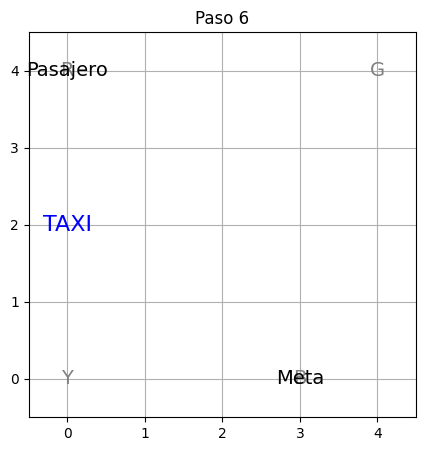

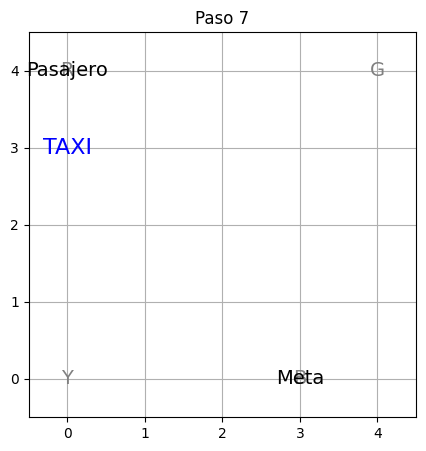

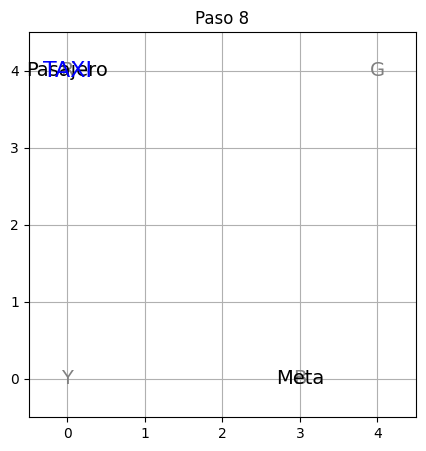

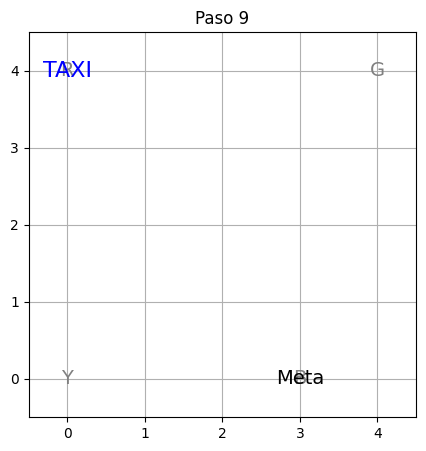

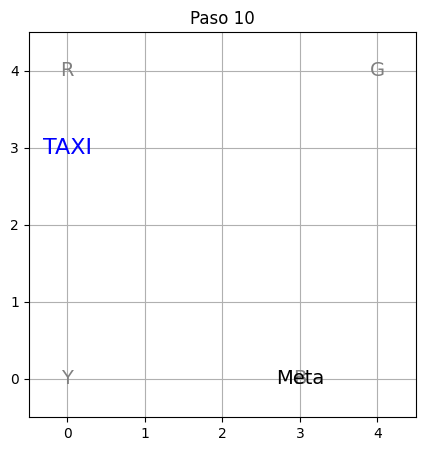

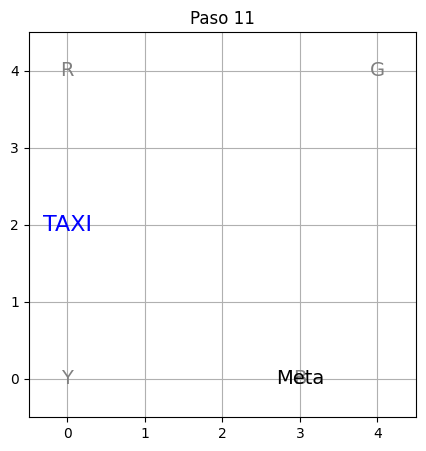

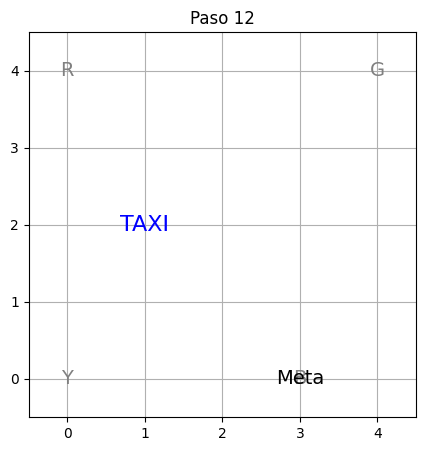

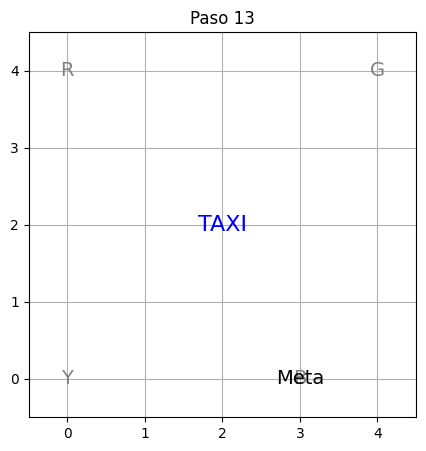

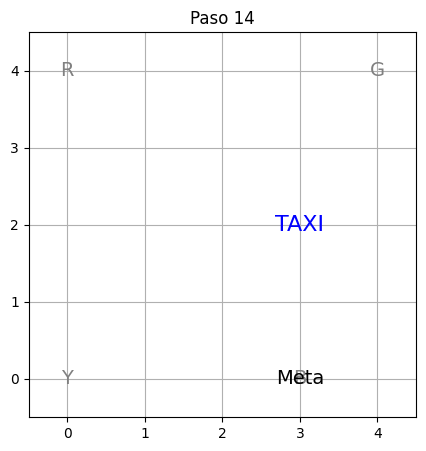

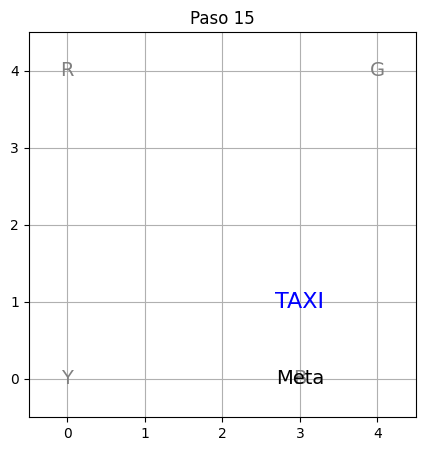

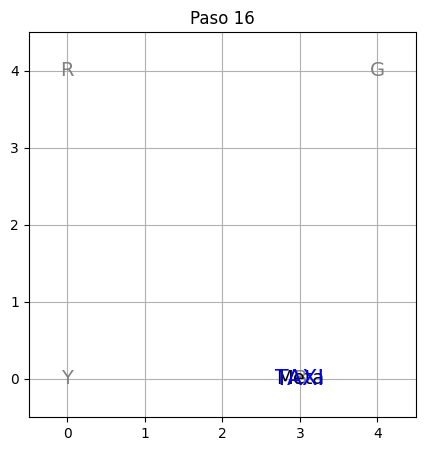

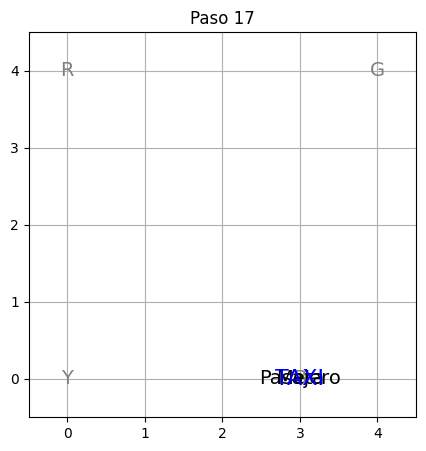

🏁 Episodio terminado. Recompensa total: 4


In [ ]:
visualize_taxi_agent(env, q_table)

En el entorno Taxi-v3, el agente debe aprender no solo a resolver la tarea de recoger y dejar al pasajero, sino también a hacerlo de forma eficiente, minimizando penalizaciones por movimientos innecesarios o acciones inválidas. A diferencia de entornos más simples como FrozenLake, Taxi-v3 proporciona retroalimentación constante gracias a su sistema de recompensas y castigos, lo cual acelera el aprendizaje si se configura correctamente.

La tasa de exploración (epsilon_decay) juega un papel crucial: si el agente explora durante más tiempo (por ejemplo, con epsilon_decay = 0.999), tiene más oportunidades de descubrir trayectorias óptimas y evitar comportamientos subóptimos. En cambio, una exploración demasiado corta puede hacer que el agente converja rápidamente, pero hacia políticas mediocres.

Por último, la visualización del comportamiento del taxi entrenado permite validar si la política aprendida tiene sentido, más allá de observar únicamente las recompensas. Este ejercicio demuestra cómo Q-Learning es una herramienta eficaz en entornos con estados y acciones discretos, y sienta las bases para escalar hacia enfoques más complejos como DQNs en espacios continuos.

# Práctica Introducción a las redes neuronales
Las redes neuronales artificiales son modelos inspirados en el funcionamiento del cerebro humano, capaces de aprender patrones complejos a partir de datos. A diferencia de los algoritmos tradicionales con reglas explícitas, una red neuronal aprende a resolver tareas ajustando automáticamente sus parámetros internos (pesos) durante el entrenamiento.

En esta práctica, vamos a centrarnos en un tipo sencillo pero poderoso: la red neuronal feedforward (FFNN). Estas redes están formadas por capas de neuronas artificiales conectadas entre sí (perceptron), donde la información fluye en una sola dirección: de la entrada a la salida.

Para entender mejor cómo funcionan, vamos a aplicar una FFNN sobre el dataset MNIST, un conjunto clásico de imágenes de dígitos escritos a mano. A lo largo del ejercicio veremos cómo la red es capaz de aprender a reconocer estos dígitos ajustando sus pesos capa a capa.

El objetivo no es solo que funcione, sino entender por qué funciona

**¿Qué aprenderás?**
- Cómo funciona una red neuronal feedforward (FFNN) por dentro.
- Qué papel juegan las capas, las funciones de activación, la función de pérdida y el optimizador.
- Cómo cargar y preparar un dataset visual (MNIST).
- Cómo construir, entrenar y evaluar una red neuronal simple en PyTorch.
- Cómo interpretar el proceso de aprendizaje observando la evolución de la pérdida (loss).
- Qué impacto tiene la arquitectura (número de capas, neuronas) en el rendimiento del modelo.

**Objetivos:**
- Comprender la estructura básica de una red neuronal feedforward (FFNN).
- Entrenar una red sencilla en un dataset visual (MNIST).
- Visualizar el proceso de aprendizaje.
- Resolverlo con dos librerías: PyTorch y scikit-learn

## Parte 3: FFNN en PyTorch para predecir MNIST

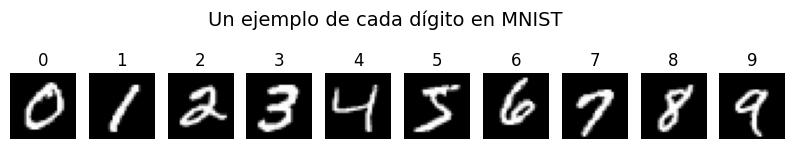

In [ ]:
# comprensión del dataset MNIST
import matplotlib.pyplot as plt
import torch
import torch.nn as nn # modulo de rrnn de PyTorch
import torch.optim as optim # optimizadores (gradient descent)
from torchvision import datasets, transforms # conjunto de datos

# Carga y normalización del dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Diccionario para guardar una imagen por clase
examples = {}

# Recorremos el dataset hasta tener un ejemplo por clase
for image, label in train_dataset:
    if label not in examples:
        examples[label] = image
    if len(examples) == 10:
        break

# Mostrar los 10 dígitos
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(examples[i].squeeze(), cmap='gray')
    plt.title(str(i))
    plt.axis('off')

plt.suptitle("Un ejemplo de cada dígito en MNIST", fontsize=14)
plt.show()

In [ ]:
# Definición de la red neuronal
class SimpleFFNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Capa oculta
        self.relu = nn.ReLU()             # Activación
        self.fc2 = nn.Linear(128, 10)     # Capa de salida

    def forward(self, x):
        x = x.view(-1, 28*28)             # Aplanar la imagen (de 28x28 a 784)
        x = self.relu(self.fc1(x))        # Activación sobre la capa oculta
        x = self.fc2(x)                   # Capa de salida sin activación (ya lo hace CrossEntropy)
        return x

In [ ]:
# la inicializamos, definimos la función de coste y el optimizador
model = SimpleFFNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

¿Qué hace esto? Este es el bucle de entrenamiento, donde la red aprende:

- Para cada lote, calcula la salida (outputs).
- Calcula el error (loss) entre predicción y etiqueta real.
- zero_grad() limpia los gradientes anteriores.
- backward() hace la retropropagación del error.
- step() actualiza los pesos.

In [ ]:
# entrenamiento 5 epochs (poco para no demorar mucho)
for epoch in range(5):
    for images, labels in train_loader:
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.1842
Epoch 2, Loss: 0.0850
Epoch 3, Loss: 0.2712
Epoch 4, Loss: 0.0157
Epoch 5, Loss: 0.0212


In [ ]:
# medimos performance
def compute_accuracy(model, data_loader):
    model.eval()  # Modo evaluación (desactiva dropout/batchnorm si existieran)
    correct = 0
    total = 0
    with torch.no_grad():  # No calculamos gradientes
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


In [ ]:
# Dataset de prueba
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)

In [ ]:
# Accuracy en entrenamiento
train_accuracy = compute_accuracy(model, train_loader)
print(f"Precisión en entrenamiento: {train_accuracy:.2f}%")

# Accuracy en test
test_accuracy = compute_accuracy(model, test_loader)
print(f"Precisión en test: {test_accuracy:.2f}%")

Precisión en entrenamiento: 98.66%
Precisión en test: 97.50%


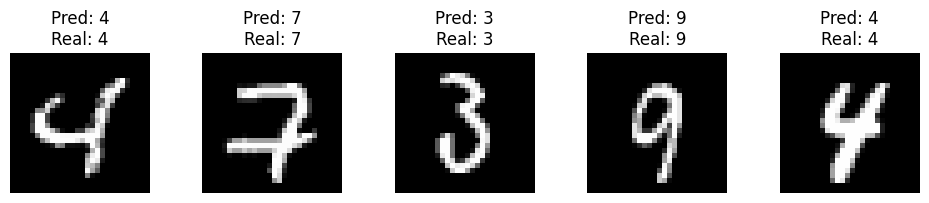

In [ ]:
# Obtener un lote de imágenes de prueba
images, labels = next(iter(test_loader))

# Pasarlas por el modelo
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Mostrar imágenes con predicciones
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted[i].item()}\nReal: {labels[i].item()}")
    plt.axis('off')

plt.show()

## Parte 4: Implementación usando scikit-learn

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Cargamos MNIST desde OpenML (tarda unos segundos la primera vez)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)  # X: imágenes, y: etiquetas

# Normalizamos los datos (de 0-255 a 0-1)
X = X / 255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=5)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128,), max_iter=5)

In [ ]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Precisión en entrenamiento:", accuracy_score(y_train, train_preds) * 100, "%")
print("Precisión en test:", accuracy_score(y_test, test_preds) * 100, "%")

Precisión en entrenamiento: 97.9232142857143 %
Precisión en test: 96.76428571428572 %


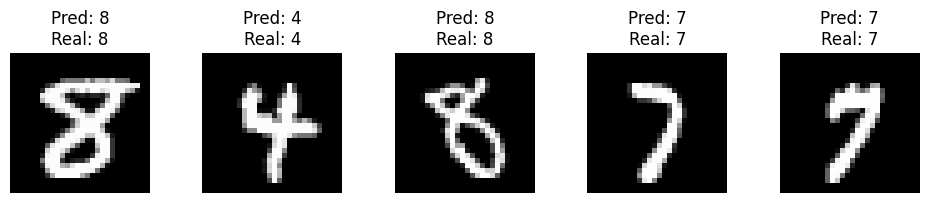

In [ ]:
# Mostrar 10 ejemplos del test set con su predicción
plt.figure(figsize=(12, 4))
for i in range(5):
    img = X_test[i].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {test_preds[i]}\nReal: {y_test[i]}")
    plt.axis('off')
plt.show()

**Conclusiones: PyTorch vs scikit-learn**
1. Flexibilidad vs Simplicidad
  - **PyTorch**:
  Permite construir redes desde cero, controlar el forward pass, definir la arquitectura a bajo nivel y modificar el entrenamiento paso a paso. Ideal para aprender en detalle cómo funciona una red neuronal internamente y para escalar a modelos más complejos (CNNs, RNNs, Transformers).

  - **scikit-learn**:
  Muy accesible para empezar: con pocas líneas puedes entrenar una red feedforward. No requiere conocer cómo se propagan los gradientes ni cómo se actualizan los pesos. Perfecto para enseñar el concepto de una FFNN sin entrar aún en los detalles de bajo nivel.

2. Aprendizaje conceptual
  - **PyTorch**:
  Refuerza la comprensión de cómo aprende una red neuronal (gracias a la visibilidad del ciclo de entrenamiento). Se entiende mejor la relación entre input, output, loss y optimización.

  - **scikit-learn**:
  Ideal para entender qué es una red neuronal como modelo de clasificación, pero no muestra tanto el proceso interno. Buena puerta de entrada antes de pasar a frameworks más complejos.

3. Rendimiento y capacidad
  - **PyTorch**:
  Permite personalizar redes más profundas y complejas, usar GPU, trabajar con imágenes, texto o secuencias, y optimizar modelos grandes.

  - **scikit-learn**:
  Solo soporta redes FFNN simples, no aprovecha GPU y no está pensado para imágenes complejas ni secuencias. Se vuelve lento con muchos datos o muchas capas.